In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd

# Read the CSV file
app_reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IDCamp24/ulasan_aplikasi.csv')

Mounted at /content/drive


In [ ]:
!pip install google-play-scraper
!pip install wordcloud
!pip install Sastrawi
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks


from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
app_reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IDCamp24/ulasan_aplikasi.csv')
app_reviews_df.info()
jumlah_baris, jumlah_kolom = app_reviews_df.shape
print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144000 entries, 0 to 143999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              144000 non-null  object
 1   userName              144000 non-null  object
 2   userImage             144000 non-null  object
 3   content               143999 non-null  object
 4   score                 144000 non-null  int64 
 5   thumbsUpCount         144000 non-null  int64 
 6   reviewCreatedVersion  129104 non-null  object
 7   at                    144000 non-null  object
 8   replyContent          25673 non-null   object
 9   repliedAt             25673 non-null   object
 10  appVersion            129104 non-null  object
dtypes: int64(2), object(9)
memory usage: 12.1+ MB
Jumlah baris: 144000
Jumlah kolom: 11


In [ ]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize.treebank import TreebankWordDetokenizer  # Import TreebankWordDetokenizer

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

# Define text cleaning functions
def cleaningText(text):
    """Cleans the text by removing punctuation, numbers, and extra whitespace."""
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

def depure_data(data):

    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://S+|www.S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('S*@S*s?', '', data)

    # Remove new line characters
    data = re.sub('s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("'", "", data)

    return data

def casefoldingText(text):
    """Converts text to lowercase."""
    return text.lower()

def tokenizingText(text):
    """Tokenizes the text into words."""
    return word_tokenize(text)

def filteringText(text):
    """Removes stop words from the text."""
    listStopwords = set(stopwords.words('indonesian'))
    filtered = [w for w in text if not w in listStopwords]
    return filtered

def toSentence(list_words):
    """Joins a list of words into a sentence."""
    return " ".join(list_words)

def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Assuming 'clean_df' is your DataFrame and 'content' column contains the text
# Replace 'selected_text' with 'content' if 'selected_text' doesn't exist
temp = []
data_to_list = clean_df['content'].values.tolist()  # Using 'content' column
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))

# Install and import gensim if not already installed
!pip install gensim
import gensim

# Now call sent_to_words
data_words = list(sent_to_words(temp))

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}


In [ ]:
# Install and import gensim if not already installed
!pip install gensim
import gensim

# Now call sent_to_words
data_words = list(sent_to_words(temp))

data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

clean_df.info()

['kenapa aya abi aktifkan gopay tabungan jd tidak bi tran fer ala annya karna udah dipindah ke gopay tabungan pa dicek aldo ko ong tp dilayar utama ma ih ada aldonya gimana ini meneru kan ternyata ada keterlambatan meng update aldo uruh ngecek aldo ecara berkala gak tau ampe kapan keburu token li trik gua habi', 'minimal pembayaran di ini nggak guna diteror teru me kipun udah melakukan minimal pembayaran di gopay pinjam hilangkan aja minimal pembayaran klo nggak guna katanya bukan eperti kartu kredit nggak ada toleran nya ama ekali', 'tidak eperti banking bank digital lainnya nominal tarik tunai tidak flek ibel hanya bi melakukan tarik tunai uai nominal yang tertera aja jadi haru melakukan beberapa kali tran ak bahkan untuk nominal dibawah juta yang berarti haru membayar biaya lebih fitur keamanannya juga hanya ada pada aat melakukan tran ak tidak fitur ada penggamanan pelapi aat membuka aplika eperti banking pada umumnya padahal acount udah upgrade menjadi tabungan bukan hanya wallet'

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,bfaeac7c-baeb-4c5a-96bf-00c4d3925cee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa saya abis aktifkan gopay tabungan jd ti...,3,10,1.40.1,2025-01-30 13:02:52,"Hai Kak Abdul, sebelum transfer, pastikan stat...",2025-01-30 12:14:40,1.40.1,Kenapa saya abis aktifkan gopay tabungan jd ti...,kenapa saya abis aktifkan gopay tabungan jd ti...,kenapa saya habis aktifkan gopay tabungan jd t...,"[kenapa, saya, habis, aktifkan, gopay, tabunga...","[habis, aktifkan, gopay, tabungan, jd, transfe...",habis aktifkan gopay tabungan jd transferalasa...
1,ce4ec511-e282-442a-a548-663c9cbca0af,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Minimal pembayaran disini nggak guna, diteror ...",1,27,1.40.1,2025-01-30 14:00:54,"Hai Kak Agus, mohon maaf atas kendala yang kam...",2025-01-30 16:11:27,1.40.1,Minimal pembayaran disini nggak guna diteror t...,minimal pembayaran disini nggak guna diteror t...,minimal pembayaran disini nggak guna diteror t...,"[minimal, pembayaran, disini, nggak, guna, dit...","[minimal, pembayaran, nggak, diteror, minimal,...",minimal pembayaran nggak diteror minimal pemba...
2,c8ba5722-b3cd-4146-b2cd-ff66fc302da5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak seperti m.banking / bank digital lainnya...,1,148,1.39.0,2025-01-05 16:40:55,"Hai Kak Reza, mohon maaf atas ketidaknyamanann...",2025-01-05 23:17:09,1.39.0,Tidak seperti mbanking bank digital lainnyanom...,tidak seperti mbanking bank digital lainnyanom...,tidak seperti mbanking bank digital lainnyanom...,"[tidak, seperti, mbanking, bank, digital, lain...","[mbanking, bank, digital, lainnyanominal, tari...",mbanking bank digital lainnyanominal tarik tun...
4,db8d3d4e-c543-46f7-b8f3-57ffc698e65c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kesannya maksa bgt Marketing lu ajarin, bukan ...",1,133,1.39.0,2025-01-13 17:54:58,"Hai Kak Fadillah, mohon maaf atas ketidaknyama...",2025-01-14 00:24:58,1.39.0,Kesannya maksa bgt Marketing lu ajarin bukan c...,kesannya maksa bgt marketing lu ajarin bukan c...,kesannya maksa banget marketing lu ajarin buka...,"[kesannya, maksa, banget, marketing, lu, ajari...","[kesannya, maksa, banget, marketing, lu, ajari...",kesannya maksa banget marketing lu ajarin bany...
6,d39b6e4a-6f59-4964-9e9f-76f5bfe28d4a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Parahhhh aplikasi niiii, transfer ga bisa haru...",1,149,1.39.0,2025-01-17 04:43:16,"Hai Kak Nailul, mohon maaf atas ketidaknyamana...",2025-01-21 10:07:05,1.39.0,Parahhhh aplikasi niiii transfer ga bisa harus...,parahhhh aplikasi niiii transfer ga bisa harus...,parahhhh aplikasi niiii transfer ga bisa harus...,"[parahhhh, aplikasi, niiii, transfer, ga, bisa...","[parahhhh, aplikasi, niiii, transfer, ga, upgr...",parahhhh aplikasi niiii transfer ga upgrade gi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143800,217ad395-8f72-4a2e-9e5b-d6d2422e52cd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gopay apk jelek parah,1,0,1.15.1,2024-02-07 22:39:13,"Hai Kak Meysha, mohon maaf atas ketidaknyamana...",2024-02-08 10:54:24,1.15.1,gopay apk jelek parah,gopay apk jelek parah,gopay apk jelek parah,"[gopay, apk, jelek, parah]","[gopay, apk, jelek, parah]",gopay apk jelek parah
143856,5de54188-f6ac-43a9-8bed-e9f61fc36112,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,go top 5,3,0,1.15.1,2024-01-26 01:25:39,"Hai Kak Indra, terima kasih atas ulasannya. Kr...",2024-01-26 09:01:54,1.15.1,go top,go top,go top,"[go, top]","[go, top]",go top
143857,dae6785d-f147-400e-b010-1b88aae62cea,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,GO pay ok,3,0,1.15.1,2024-03-26 23:01:33,"Hai Kak Akhmad, terima kasih atas ulasan

# Pelabelan

In [ ]:
import os
import pandas as pd
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    # Tokenize the text into words
    words = text.split()  # Assuming words are separated by spaces

    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]  # Note: negative lexicon scores should be negative

    # Define sentiment thresholds (adjust as needed)
    if score > 1:  # Example threshold for positive
        polarity = 'positive'
    elif score < -1:  # Example threshold for negative
        polarity = 'negative'
    else:
        polarity = 'neutral'  # If score is between -1 and 1

    return score, polarity

# Replace 'text_akhir' with the correct column name
# Replace 'reviewId' with 'text_akhir' or the correct column name if different
# The updated code snippet should look like this:
results = clean_df['text_akhir'].apply(sentiment_analysis_lexicon_indonesia) # Assuming 'reviewId' has the text
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    9613
positive    5315
neutral     5188
Name: count, dtype: int64


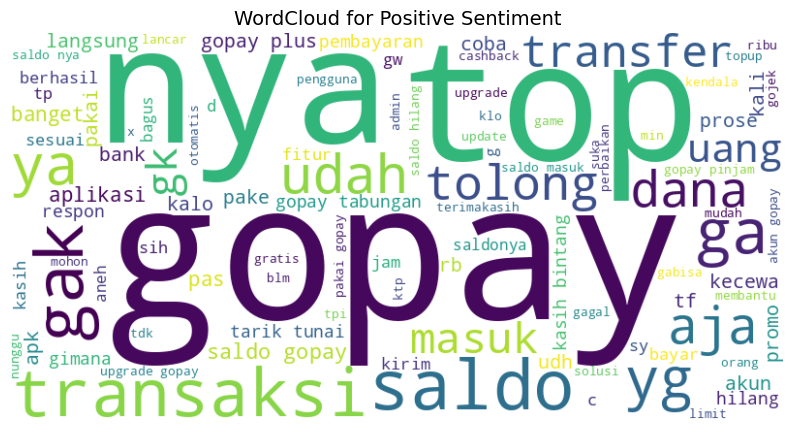

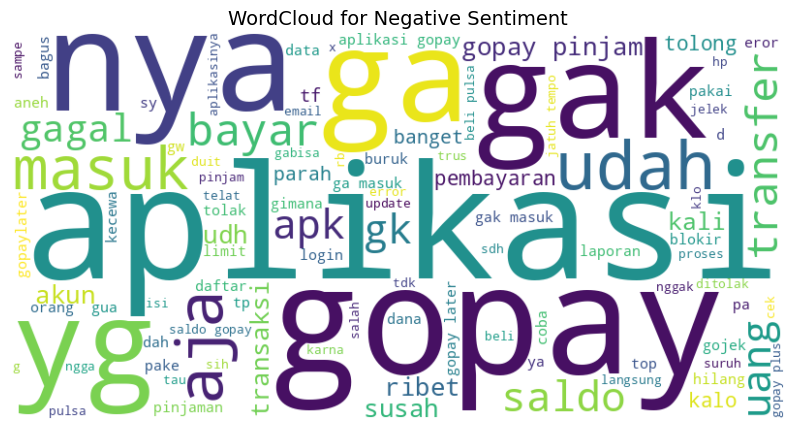

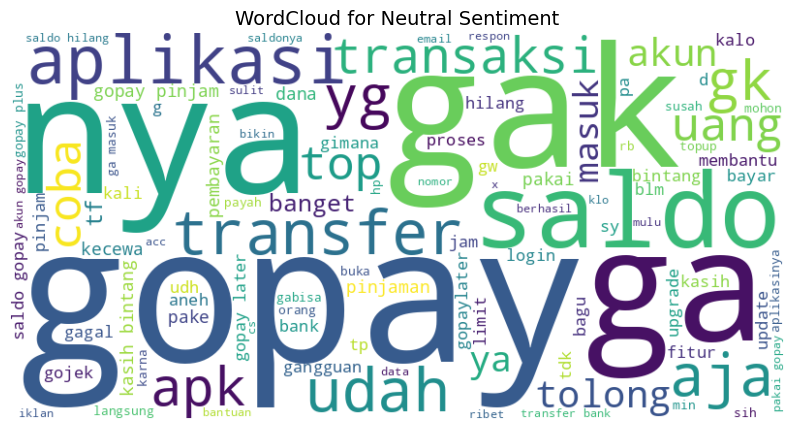

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat WordCloud
def create_wordcloud(text, sentiment_label):
    # Check if the text is empty
    if len(text) == 0:
        print(f"No {sentiment_label} reviews found. Skipping WordCloud generation.")
        return  # Exit the function if text is empty

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=100
    ).generate(' '.join(text))

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment_label} Sentiment', fontsize=14)
    plt.show()

# Filter data berdasarkan sentimen
# Replace 'reviewId' with the actual column name containing the text data
# Assuming 'text_akhir' is the correct column for the review text
positive_text = clean_df[clean_df['polarity'] == 'positive']['text_akhir']
negative_text = clean_df[clean_df['polarity'] == 'negative']['text_akhir']
neutral_text = clean_df[clean_df['polarity'] == 'neutral']['text_akhir']

# 1. WordCloud untuk Sentimen Positif
create_wordcloud(positive_text, 'Positive')

# 2. WordCloud untuk Sentimen Negatif
create_wordcloud(negative_text, 'Negative')

# 3. WordCloud untuk Sentimen Netral
create_wordcloud(neutral_text, 'Neutral')

# Data Splitting dan Ekstraksi Fitur dengan TF-IDF or other feature extraction methods (e.g., Word2Vec, GloVe, or embeddings from a pre-trained model like BERT).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=1000, min_df=3, max_df=0.75)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
print(features_df)

       acc  account   ad  admin   ah   aj       aja  ajah  ajg  ajuin  ...  \
0      0.0      0.0  0.0    0.0  0.0  0.0  0.000000   0.0  0.0    0.0  ...   
1      0.0      0.0  0.0    0.0  0.0  0.0  0.000000   0.0  0.0    0.0  ...   
2      0.0      0.0  0.0    0.0  0.0  0.0  0.000000   0.0  0.0    0.0  ...   
3      0.0      0.0  0.0    0.0  0.0  0.0  0.174998   0.0  0.0    0.0  ...   
4      0.0      0.0  0.0    0.0  0.0  0.0  0.000000   0.0  0.0    0.0  ...   
...    ...      ...  ...    ...  ...  ...       ...   ...  ...    ...  ...   
20111  0.0      0.0  0.0    0.0  0.0  0.0  0.000000   0.0  0.0    0.0  ...   
20112  0.0      0.0  0.0    0.0  0.0  0.0  0.000000   0.0  0.0    0.0  ...   
20113  0.0      0.0  0.0    0.0  0.0  0.0  0.000000   0.0  0.0    0.0  ...   
20114  0.0      0.0  0.0    0.0  0.0  0.0  0.000000   0.0  0.0    0.0  ...   
20115  0.0      0.0  0.0    0.0  0.0  0.0  0.000000   0.0  0.0    0.0  ...   

         wallet  wdp  wifi  woi  woy   ya  yaa  yah   yg  zonk 

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# **Step 1: Preprocessing Data**
max_words = 10000  # Jumlah maksimum kata dalam vocabulary
max_len = 150  # Increased max length for better context
embedding_dim = 100  # Increased embedding dimension for richer representations

# Assuming 'clean_df' is your DataFrame and 'text_akhir' is the column with text data
texts = clean_df['text_akhir'].values  # Assign the text data to 'texts'

# Tokenisasi teks
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)  # Pastikan 'texts' sudah ada
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)

# Assuming 'polarity' column contains the labels
# Convert labels to numerical representation if needed (e.g., using LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(clean_df['polarity'])

# Konversi label ke one-hot encoding
y = to_categorical(labels, num_classes=3)  # Pastikan 'labels' sudah ada

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure data and labels are numpy arrays and are in correct dtype
data = np.array(data)  # If it's not already a numpy array
labels = np.array(labels).astype(int)  # Ensure labels are integers

# Print data types and shapes for verification
print("Data type of 'data':", data.dtype)
print("Shape of 'data':", data.shape)
print("Data type of 'labels':", labels.dtype)
print("Shape of 'labels':", labels.shape)

# **Step 2: Model 1 (LSTM with Improvements)**
model1 = Sequential([
    layers.Embedding(max_words, embedding_dim, input_length=max_len),
    layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),  # Increased LSTM units, added recurrent dropout
    layers.Dense(32, activation='relu'),  # Added a dense layer for better feature extraction
    layers.Dropout(0.5),  # Added dropout for regularization
    layers.Dense(3, activation='softmax')
])

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Add this line to compile the model

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode="max")

checkpoint1 = ModelCheckpoint("best_model1.keras", monitor='val_accuracy', save_best_only=True)

history1 = model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
callbacks=[checkpoint1, early_stopping])

# **Step 3: Model 2 (Bidirectional LSTM with Improvements)**
model2 = Sequential([
    layers.Embedding(max_words, embedding_dim, input_length=max_len),
    layers.Bidirectional(layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2)),  # Increased LSTM units, added recurrent dropout
    layers.Dense(16, activation='relu'),  # Added a dense layer
    layers.Dropout(0.5),  # Added dropout
    layers.Dense(3, activation='softmax')
])


# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Add this line to compile the model
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode="max")

checkpoint2 = ModelCheckpoint("best_model2.keras", monitor='val_accuracy', save_best_only=True)

history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
callbacks=[checkpoint2, early_stopping])  # Add early_stopping to callbacks

# **Step 4: Model 3 (CNN with Improvements)**
model3 = Sequential([
    layers.Embedding(max_words, embedding_dim, input_length=max_len),
    layers.Conv1D(64, 5, activation='relu'),  # Increased filters
    layers.MaxPooling1D(pool_size=4),
    layers.Conv1D(32, 5, activation='relu'), # Increased filters
    layers.GlobalMaxPooling1D(),
    layers.Dense(16, activation='relu'), # Added dense layer
    layers.Dropout(0.5), # Added dropout
    layers.Dense(3, activation='softmax')
])


# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Add this line to compile the model

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode="max")

checkpoint3 = ModelCheckpoint("best_model3.keras", monitor='val_accuracy', save_best_only=True)

history3 = model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
callbacks=[checkpoint3, early_stopping])  # Add early_stopping to callbacks

# Get the best scores for each model
_, best_accuracy_lstm = model1.evaluate(X_test, y_test, verbose=0)
_, best_accuracy_bilstm = model2.evaluate(X_test, y_test, verbose=0)
_, best_accuracy_cnn = model3.evaluate(X_test, y_test, verbose=0)

print(f"LSTM Best Accuracy: {best_accuracy_lstm:.4f}")
print(f"Bidirectional LSTM Best Accuracy: {best_accuracy_bilstm:.4f}")
print(f"CNN Best Accuracy: {best_accuracy_cnn:.4f}")


Data type of 'data': <U487
Shape of 'data': (20116,)
Data type of 'labels': int64
Shape of 'labels': (20116,)
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


503/503 ━━━━━━━━━━━━━━━━━━━━ 122s 231ms/step - accuracy: 0.5803 - loss: 0.8912 - val_accuracy: 0.8293 - val_loss: 0.4132
Epoch 2/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 141s 228ms/step - accuracy: 0.8765 - loss: 0.3392 - val_accuracy: 0.8628 - val_loss: 0.3351
Epoch 3/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 139s 223ms/step - accuracy: 0.9154 - loss: 0.2315 - val_accuracy: 0.8653 - val_loss: 0.3409
Epoch 4/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 110s 218ms/step - accuracy: 0.9386 - loss: 0.1700 - val_accuracy: 0.8700 - val_loss: 0.3748
Epoch 5/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 144s 222ms/step - accuracy: 0.9556 - loss: 0.1374 - val_accuracy: 0.8738 - val_loss: 0.4453
Epoch 6/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 139s 216ms/step - accuracy: 0.9625 - loss: 0.1092 - val_accuracy: 0.8770 - val_loss: 0.4678
Epoch 7/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 147s 227ms/step - accuracy: 0.9636 - loss: 0.1060 - val_accuracy: 0.8666 - val_loss: 0.5014
Epoch 8/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 138s 219ms/step - accuracy: 0.9757 - loss: 0.07

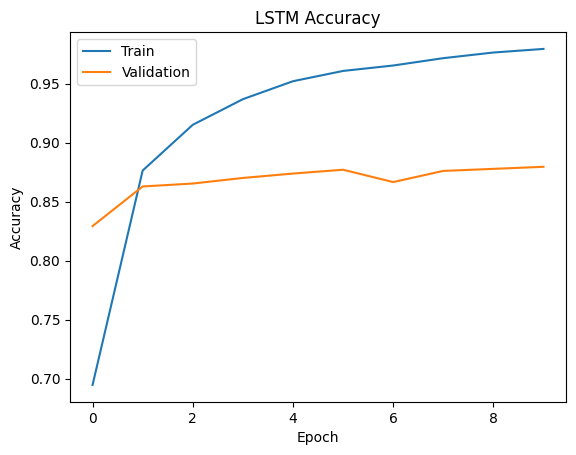

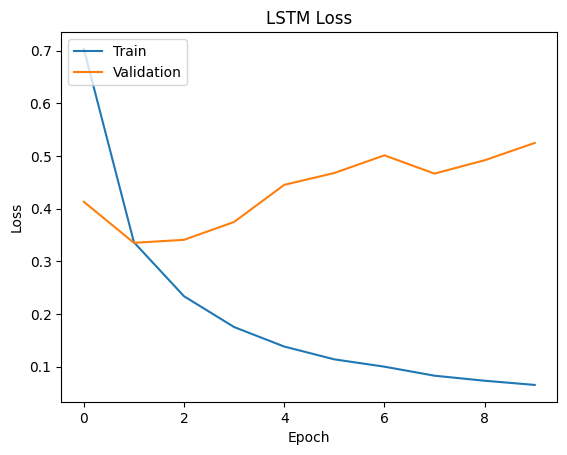

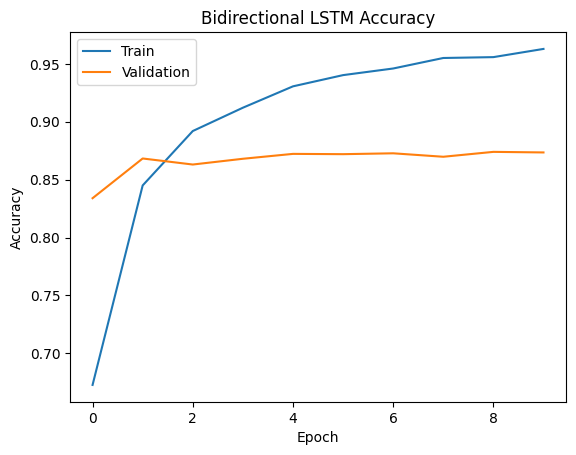

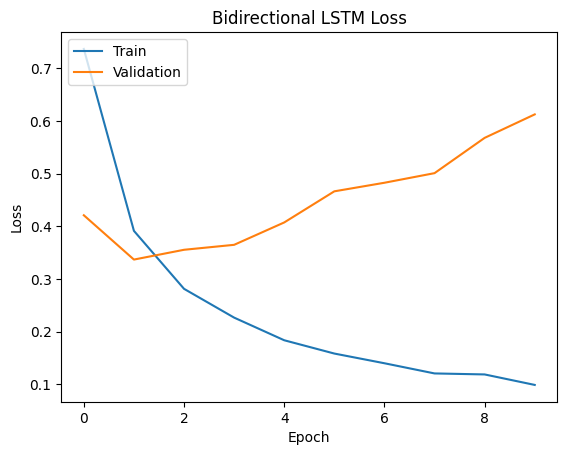

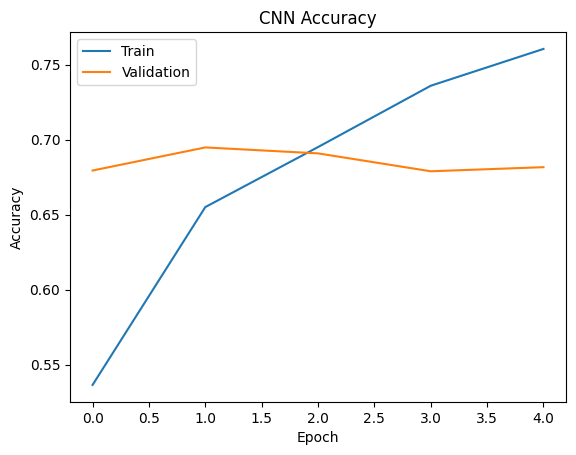

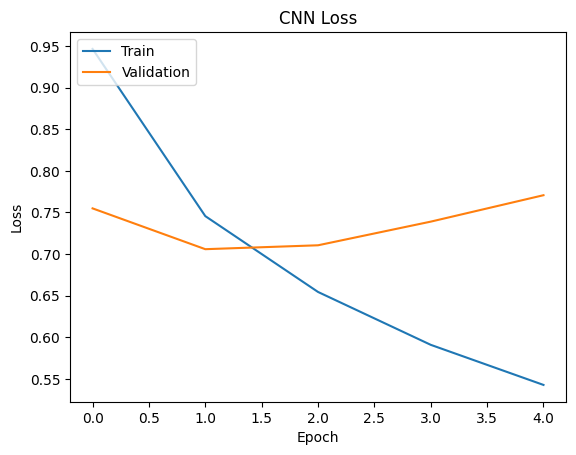

In [52]:
# Updated plotting code
import matplotlib.pyplot as plt

# Function to plot accuracy
def plot_accuracy(history, model_name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Function to plot loss
def plot_loss(history, model_name):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot accuracy and loss for each model using the updated variable names
plot_accuracy(history1, 'LSTM')
plot_loss(history1, 'LSTM')

plot_accuracy(history2, 'Bidirectional LSTM')
plot_loss(history2, 'Bidirectional LSTM')

plot_accuracy(history3, 'CNN')
plot_loss(history3, 'CNN')

# Naive Bayes

In [54]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Assuming y_train is one-hot encoded, convert it back to class labels:
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train, y_train_labels)  # Use y_train_labels here

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train)
y_pred_test_nb = naive_bayes.predict(X_test)

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train_labels)  # Use y_train_labels
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test_labels)  # Use y_test_labels

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.43593089734029333
Naive Bayes - accuracy_test: 0.4470675944333996


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
# Menghapus .toarray() karena X_train sudah berupa array NumPy
random_forest.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
# Menghapus .toarray() karena X_train dan X_test sudah berupa array NumPy
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.3789761431411531


# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Assuming y_train is one-hot encoded, convert it back to class labels:
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


# Melatih model Logistic Regression pada data pelatihan
# Menghapus .toarray() karena X_train sudah berupa array NumPy
logistic_regression.fit(X_train, y_train_labels)  # Use y_train_labels here

# Prediksi sentimen pada data pelatihan dan data uji
# Menghapus .toarray() karena X_train dan X_test sudah berupa array NumPy
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train_labels)  # Use y_train_labels here

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test_labels)  # Use y_test_labels here

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.47775292070594083
Logistic Regression - accuracy_test: 0.47763419483101394


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Descision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
# Menghapus .toarray() karena X_train sudah berupa array NumPy
decision_tree.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
# Menghapus .toarray() karena X_train dan X_test sudah berupa array NumPy
y_pred_train_dt = decision_tree.predict(X_train)
y_pred_test_dt = decision_tree.predict(X_test)

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 1.0
Decision Tree - accuracy_test: 0.459493041749503
